In [1]:
import pandas as pd
import networkx as nx
import matplotlib as plt
from sklearn.metrics.pairwise import cosine_similarity

In [65]:
teams_df = pd.read_csv("cfb22.csv")
stats_df = teams_df[['Team','Rush Yds', 'Pass Yards']]
stats_df

,Team,Rush Yds,Pass Yards
0,Tennessee (SEC),2593,4239
1,Washington (Pac-12),1898,4807
2,Southern California (Pac-12),2396,4696
3,UCLA (Pac-12),3084,3463
4,Georgia (SEC),3080,4437
...,...,...,...
126,Rutgers (Big Ten),1538,1847
127,Colorado (Pac-12),1300,2075
128,Massachusetts (FBS Independent),1786,1403
129,Iowa (Big Ten),1234,2037


In [32]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
scaler = MinMaxScaler()
cols_to_normalize = [col for col in stats_df.columns if pd.api.types.is_numeric_dtype(teams_df[col])]
df_normalized = pd.DataFrame(stats_df[cols_to_normalize])
df_normalized[cols_to_normalize] = scaler.fit_transform(df_normalized[cols_to_normalize])
df_normalized = pd.concat([df_normalized, stats_df.drop(columns=cols_to_normalize)], axis=1)
df_normalized.head()


,Rush Yds,Pass Yards,Team
0,0.525939,0.827646,Tennessee (SEC)
1,0.326741,0.969116,Washington (Pac-12)
2,0.469475,0.941469,Southern California (Pac-12)
3,0.666667,0.634371,UCLA (Pac-12)
4,0.665520,0.876961,Georgia (SEC)


<AxesSubplot:xlabel='Rush Yds', ylabel='Pass Yards'>

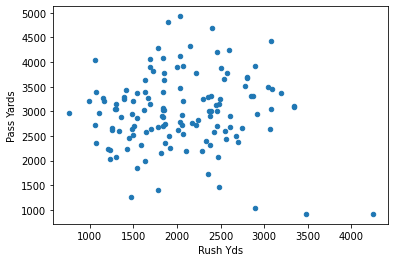

In [71]:
teams_df.plot.scatter(x='Rush Yds',y='Pass Yards')

In [93]:
cosine_similarities = cosine_similarity(df_normalized[df_normalized['Team'] != 'Georgia (SEC)'][['Rush Yds', 'Pass Yards']],
                                        df_normalized[df_normalized['Team'] == 'Georgia (SEC)'][['Rush Yds', 'Pass Yards']])

georgia_similarities = {}
for i, Team in enumerate(df_normalized[df_normalized['Team'] != 'Georgia (SEC)']['Team']):
    georgia_similarities[Team] = cosine_similarities[i][0]

ordered_similarities = {k: v for k, v in sorted(georgia_similarities.items(), key=lambda item: item[1], reverse=True)}

print("Cosine similarity scores of every team compared to Georgia Bulldogs:")
for team, similarity_score in ordered_similarities.items():
    print(team, similarity_score)

Cosine similarity scores of every team compared to Georgia Bulldogs:
BYU (FBS Independent) 0.9999998995272896
Alabama (SEC) 0.9999765715026261
James Madison (Sun Belt) 0.9999489577546649
Penn St. (Big Ten) 0.9999425575656694
LSU (SEC) 0.9998531340412009
Missouri (SEC) 0.9998479825855962
Kansas (Big 12) 0.999835636054752
TCU (Big 12) 0.9993240749593946
Southern Miss. (Sun Belt) 0.9992780637692249
Ball St. (MAC) 0.9992490148116012
West Virginia (Big 12) 0.9991821377387267
Georgia Tech (ACC) 0.998993197291259
Central Mich. (MAC) 0.9988185964676151
Oregon (Pac-12) 0.9986108392107752
UTEP (C-USA) 0.9985715582756256
Ohio St. (Big Ten) 0.9985461008519343
Hawaii (Mountain West) 0.9983628731892673
North Texas (C-USA) 0.9983608866601059
Clemson (ACC) 0.9983608688770644
Coastal Carolina (Sun Belt) 0.9979059564909816
Texas (Big 12) 0.9976059044375083
San Diego St. (Mountain West) 0.9973166562348419
Baylor (Big 12) 0.9970880446819832
Illinois (Big Ten) 0.9970534614771414
Toledo (MAC) 0.996977798395